In [34]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import json
import random
from scipy import stats
%matplotlib inline

In [35]:
dump_fpath = 'declarations.json'

with open(dump_fpath) as f:
    declarations = json.loads(f.read())

In [36]:
random.choice(declarations)

{'bonds': [],
 'incomes': [{'comment': '', 'relative': None, 'size': 369656.07},
  {'comment': '',
   'relative': {'id': 2, 'name': 'Супруг(а)'},
   'size': 288838.41}],
 'main': {'document_type': {'id': 1, 'name': 'Антикоррупционная декларация'},
  'office': {'id': 539,
   'name': 'Государственный Совет Удмуртской Республики',
   'post': 'Депутат государственного совета Удмуртской Республики пятого созыва',
   'region': {'id': 20, 'name': 'Удмуртская республика'},
   'type': {'id': 18, 'name': 'Региональный, без структуры'},
   'url': 'http://www.udmgossovet.ru/'},
  'party': {'id': 6, 'name': 'КПРФ'},
  'person': {'family_name': 'Рыков',
   'given_name': 'Алексей',
   'id': 15012,
   'name': 'Рыков Алексей Николаевич',
   'patronymic_name': 'Николаевич'},
  'year': 2015},
 'real_estates': [{'comment': '',
   'country': 'Россия',
   'name': '',
   'own_type': {'id': 1, 'name': 'В собственности'},
   'region': None,
   'relative': None,
   'share': None,
   'share_type': {'id': 1, 'nam

In [37]:
len(declarations)

90864

In [38]:
df = pd.read_excel('Report_house_prices.xls', header=1)
df.columns = ['text']+list([str(x) for x in df.columns[1:]])
df.head()

text      2009      2010      2011  \
0                  Российская Федерация       NaN       NaN       NaN   
1                      все типы квартир       NaN       NaN       NaN   
2                 первичный рынок жилья  47714,92  48143,69  43686,07   
3                 вторичный рынок жилья  52895,21  59997,54  48242,98   
4  квартиры среднего качества (типовые)       NaN       NaN       NaN   

       2012      2013      2014      2015      2016  
0       NaN       NaN       NaN       NaN       NaN  
1       NaN       NaN       NaN       NaN       NaN  
2  48162,53  50208,31  51714,18  51530,15  53286,96  
3  56369,51  56478,11  58084,71  56282,88  53982,97  
4       NaN       NaN       NaN       NaN       NaN

In [39]:
df_clean = df[df.text != 'вторичный рынок жилья']

for col in df_clean.columns[1:]:
    df_clean[col] = df_clean[col].str.replace(',', '.').astype(float) 
    
df_clean.head(20)

/home/boris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


text      2009      2010      2011  \
0                   Российская Федерация       NaN       NaN       NaN   
1                       все типы квартир       NaN       NaN       NaN   
2                  первичный рынок жилья  47714.92  48143.69  43686.07   
4   квартиры среднего качества (типовые)       NaN       NaN       NaN   
5                  первичный рынок жилья  44481.09  46807.08  44777.29   
7          квартиры  улучшеного качества       NaN       NaN       NaN   
8                  первичный рынок жилья  46144.84  47684.56  42880.68   
10                      элитные квартиры       NaN       NaN       NaN   
11                 первичный рынок жилья  65616.63  69351.02  49041.66   
13             квартиры низкого качества       NaN       NaN       NaN   
15         Центральный федеральный округ       NaN       NaN       NaN   
16                      все типы квартир       NaN       NaN       NaN   
17                 первичный рынок жилья  62287.46  63591.87  53087.89   
19  квартиры среднего качества (типовые)       NaN       NaN       NaN   
20                 первичный рынок жилья  59596.52  64588.13  57915.54   
22         квартиры  улучшеного качества       NaN       NaN       NaN   
23                 первичный рынок жилья  59881.63  61465.97  51953.01   
25                      элитные квартиры       NaN       NaN       NaN   
26                 первичный рынок жилья  85676.10  96428.30  57914.31   
28             квартиры низкого качества       NaN       NaN       NaN   

        2012      2013       2014       2015       2016  
0        NaN       NaN        NaN        NaN        NaN  
1        NaN       NaN        NaN        NaN        NaN  
2   48162.53  50208.31   51714.18   51530.15   53286.96  
4        NaN       NaN        NaN        NaN        NaN  
5   49871.88  49965.71   49189.18   51370.10   55189.34  
7        NaN       NaN        NaN        NaN        NaN  
8   47178.09  49252.04   50906.38   49266.20   48674.63  
10       NaN       NaN        NaN        NaN        NaN  
11  54842.60  65754.49   80804.39   87018.94   95937.09  
13       NaN       NaN        NaN        NaN        NaN  
15       NaN       NaN        NaN        NaN        NaN  
16       NaN       NaN        NaN        NaN        NaN  
17  56332.57  59696.54   58360.81   58614.62   63902.96  
19       NaN       NaN        NaN        NaN        NaN  
20  69716.54  68998.36   49042.39   59494.85   71842.08  
22       NaN       NaN        NaN        NaN        NaN  
23  53711.82  55442.50   56615.12   52361.29   52812.48  
25       NaN       NaN        NaN        NaN        NaN  
26  64712.27  91975.36  120454.68  163547.12  186932.54  
28       NaN       NaN        NaN        NaN        NaN

In [40]:
final_dict = {}

years = range(2009, 2017)

prev_1_row = None
prev_row = None

i = 0
for row in df_clean.itertuples():
    if row.text == 'первичный рынок жилья' and prev_row.text == 'все типы квартир':
        region = prev_1_row.text
        prices = dict(zip(range(2009, 2017), [x for x in row[2:]]))
        final_dict[region] = prices
        i+=1         
    
    prev_1_row = prev_row
    prev_row = row
final_dict['Российская Федерация']

{2009: 47714.92,
 2010: 48143.69,
 2011: 43686.07,
 2012: 48162.53,
 2013: 50208.31,
 2014: 51714.18,
 2015: 51530.15,
 2016: 53286.96}

In [41]:
final_dict.keys()

dict_keys(['Российская Федерация', 'Центральный федеральный округ', 'Белгородская область', 'Брянская область', 'Владимирская область', 'Воронежская область', 'Ивановская область', 'Калужская область', 'Костромская область', 'Курская область', 'Липецкая область', 'Московская область', 'Орловская область', 'Рязанская область', 'Смоленская область', 'Тамбовская область', 'Тверская область', 'Тульская область', 'Ярославская область', 'г. Москва', 'Северо-Западный федеральный округ', 'Республика Карелия', 'Республика Коми', 'Архангельская область', 'Ненецкий автономный округ', 'Архангельская область (кроме Ненецкого автономного округа)', 'Вологодская область', 'Калининградская область', 'Ленинградская область', 'Мурманская область', 'Новгородская область', 'Псковская область', 'г.Санкт-Петербург', 'Южный федеральный округ (по 2009 год)', 'Южный федеральный  округ (с 2010 года)', 'Республика Адыгея', 'Республика Калмыкия', 'Республика Крым', 'Краснодарский край', 'Астраханская область', 'Во

In [42]:
real_estate_df = pd.DataFrame(final_dict).T
real_estate_df

2009      2010      2011      2012  \
Российская Федерация           47714.92  48143.69  43686.07  48162.53   
Центральный федеральный округ  62287.46  63591.87  53087.89  56332.57   
Белгородская область           41572.11  39340.05  40382.90  48876.90   
Брянская область               29327.78  29373.37  29219.23  31772.20   
Владимирская область           36558.71  36777.60  38647.53  39182.43   
...                                 ...       ...       ...       ...   
Амурская область               43908.62  46162.38  48065.39  57561.85   
Магаданская область                 NaN  34850.90       NaN       NaN   
Сахалинская область            65866.67  64500.11  57989.58       NaN   
Еврейская автономная область   23231.78  23614.78  28869.37  33349.24   
Крымский федеральный округ          NaN       NaN       NaN       NaN   

                                   2013      2014      2015      2016  
Российская Федерация           50208.31  51714.18  51530.15  53286.96  
Центральный федеральный округ  59696.54  58360.81  58614.62  63902.96  
Белгородская область           52931.48  54621.07  50274.82  51663.48  
Брянская область               31849.39  32575.14  32058.42  33138.60  
Владимирская область           39200.24  40796.77  38670.92  35432.38  
...                                 ...       ...       ...       ...  
Амурская область               63070.80  63539.10  57055.34  53530.61  
Магаданская область                 NaN       NaN       NaN  52941.35  
Сахалинская область            68530.73  77982.79  89338.47  77642.28  
Еврейская автономная область   36464.07  37546.18  41183.40  38507.40  
Крымский федеральный округ          NaN       NaN       NaN  50567.56  

[97 rows x 8 columns]

In [43]:
real_estate_df[real_estate_df.isnull().any(axis=1)].index

Index(['Тверская область', 'Ненецкий автономный округ',
       'Архангельская область (кроме Ненецкого автономного округа)',
       'г.Санкт-Петербург', 'Южный федеральный округ (по 2009 год)',
       'Южный федеральный  округ (с 2010 года)', 'Республика Адыгея',
       'Республика Крым', 'г.Севастополь',
       'Северо-Кавказский федеральный округ', 'Республика Ингушетия',
       'Кабардино-Балкарская Республика', 'Карачаево-Черкесская Республика',
       'Чеченская Республика', 'Чувашская Республика',
       'Тюменская область (кроме Ханты-Мансийского автономного округа - Югры и Ямало-Ненецкого автономного округа)',
       'Республика Тыва', 'Магаданская область', 'Сахалинская область',
       'Крымский федеральный округ'],
      dtype='object')

In [44]:
real_estate_df.loc['Южный федеральный округ'] = real_estate_df.loc['Южный федеральный округ (по 2009 год)'].fillna(0) + real_estate_df.loc['Южный федеральный  округ (с 2010 года)'].fillna(0)

In [45]:
real_estate_df = real_estate_df.T.fillna(real_estate_df.mean(axis=1))
real_estate_df.head()

Российская Федерация  Центральный федеральный округ  \
2009              47714.92                       62287.46   
2010              48143.69                       63591.87   
2011              43686.07                       53087.89   
2012              48162.53                       56332.57   
2013              50208.31                       59696.54   

      Белгородская область  Брянская область  Владимирская область  \
2009              41572.11          29327.78              36558.71   
2010              39340.05          29373.37              36777.60   
2011              40382.90          29219.23              38647.53   
2012              48876.90          31772.20              39182.43   
2013              52931.48          31849.39              39200.24   

      Воронежская область  Ивановская область  Калужская область  \
2009             33835.63            30155.39           46563.33   
2010             35219.34            33100.02           45207.44   
2011             35133.90            33087.51           49923.77   
2012             40240.72            33059.41           49178.03   
2013             41772.88            35424.34           50697.73   

      Костромская область  Курская область  ...  Забайкальский край  \
2009             30505.82         27635.63  ...            32932.74   
2010             30648.83         26916.55  ...            32425.35   
2011             31840.01         27908.81  ...            37807.15   
2012             33465.32         30653.59  ...            42239.28   
2013             32474.04         34211.54  ...            43943.93   

      Камчатский край  Приморский край  Хабаровский край  Амурская область  \
2009         37432.36         44472.50          52526.40          43908.62   
2010         44948.54         50664.90          48786.06          46162.38   
2011         45506.35         40329.76          50453.57          48065.39   
2012         45861.60         43227.95          62592.82          57561.85   
2013         44258.58         52543.72          69436.12          63070.80   

      Магаданская область  Сахалинская область  Еврейская автономная область  \
2009            43896.125         65866.670000                      23231.78   
2010            34850.900         64500.110000                      23614.78   
2011            43896.125         57989.580000                      28869.37   
2012            43896.125         71692.947143                      33349.24   
2013            43896.125         68530.730000                      36464.07   

      Крымский федеральный округ  Южный федеральный округ  
2009                    50567.56                 37213.73  
2010                    50567.56                 39269.15  
2011                    50567.56                 37827.24  
2012                    50567.56                 40720.67  
2013                    50567.56                 40714.96  

[5 rows x 98 columns]

In [46]:
def preprocess_name(text):
    text = text.replace('г.', '').replace('—', '-').strip().lower()
    
    replacing = {
        'республика тува (тыва)': 'республика тыва',
        'ханты-мансийский автономный округ - югра': 'ханты-мансийский автономный округ-югра',
        'республика крым*': 'крымский федеральный округ'
    }
    
    if replacing.get(text):
        text = replacing[text]
    return text

In [47]:
real_estate_df.columns = [preprocess_name(col) for col in  real_estate_df.columns] 

In [48]:
real_estate_df['российская федерация'][2016]

53286.96

In [49]:
real_estate_df.columns

Index(['российская федерация', 'центральный федеральный округ',
       'белгородская область', 'брянская область', 'владимирская область',
       'воронежская область', 'ивановская область', 'калужская область',
       'костромская область', 'курская область', 'липецкая область',
       'московская область', 'орловская область', 'рязанская область',
       'смоленская область', 'тамбовская область', 'тверская область',
       'тульская область', 'ярославская область', 'москва',
       'северо-западный федеральный округ', 'республика карелия',
       'республика коми', 'архангельская область', 'ненецкий автономный округ',
       'архангельская область (кроме ненецкого автономного округа)',
       'вологодская область', 'калининградская область',
       'ленинградская область', 'мурманская область', 'новгородская область',
       'псковская область', 'санкт-петербург',
       'южный федеральный округ (по 2009 год)',
       'южный федеральный  округ (с 2010 года)', 'республика адыгея',
  

In [50]:
[x for x in real_estate_df.columns if 'м' in x]

['владимирская область',
 'костромская область',
 'московская область',
 'смоленская область',
 'тамбовская область',
 'москва',
 'республика коми',
 'ненецкий автономный округ',
 'архангельская область (кроме ненецкого автономного округа)',
 'мурманская область',
 'республика калмыкия',
 'республика крым',
 'республика марий эл',
 'республика мордовия',
 'удмуртская республика',
 'пермский край',
 'самарская область',
 'тюменская область',
 'ханты-мансийский автономный округ-югра',
 'ямало-ненецкий автономный округ',
 'тюменская область (кроме ханты-мансийского автономного округа - югры и ямало-ненецкого автономного округа)',
 'кемеровская область',
 'омская область',
 'томская область',
 'камчатский край',
 'приморский край',
 'амурская область',
 'магаданская область',
 'еврейская автономная область',
 'крымский федеральный округ']

In [51]:
real_estate_df

российская федерация  центральный федеральный округ  \
2009              47714.92                       62287.46   
2010              48143.69                       63591.87   
2011              43686.07                       53087.89   
2012              48162.53                       56332.57   
2013              50208.31                       59696.54   
2014              51714.18                       58360.81   
2015              51530.15                       58614.62   
2016              53286.96                       63902.96   

      белгородская область  брянская область  владимирская область  \
2009              41572.11          29327.78              36558.71   
2010              39340.05          29373.37              36777.60   
2011              40382.90          29219.23              38647.53   
2012              48876.90          31772.20              39182.43   
2013              52931.48          31849.39              39200.24   
2014              54621.07          32575.14              40796.77   
2015              50274.82          32058.42              38670.92   
2016              51663.48          33138.60              35432.38   

      воронежская область  ивановская область  калужская область  \
2009             33835.63            30155.39           46563.33   
2010             35219.34            33100.02           45207.44   
2011             35133.90            33087.51           49923.77   
2012             40240.72            33059.41           49178.03   
2013             41772.88            35424.34           50697.73   
2014             44740.69            38251.36           50671.14   
2015             44262.60            36169.46           48114.83   
2016             43559.51            37630.22           48557.85   

      костромская область  курская область  ...  забайкальский край  \
2009             30505.82         27635.63  ...            32932.74   
2010             30648.83         26916.55  ...            32425.35   
2011             31840.01         27908.81  ...            37807.15   
2012             33465.32         30653.59  ...            42239.28   
2013             32474.04         34211.54  ...            43943.93   
2014             33634.66         39025.57  ...            49106.26   
2015             35861.46         34948.26  ...            53330.56   
2016             35451.35         33766.98  ...            47857.69   

      камчатский край  приморский край  хабаровский край  амурская область  \
2009         37432.36         44472.50          52526.40          43908.62   
2010         44948.54         50664.90          48786.06          46162.38   
2011         45506.35         40329.76          50453.57          48065.39   
2012         45861.60         43227.95          62592.82          57561.85   
2013         44258.58         52543.72          69436.12          63070.80   
2014         65046.39         54597.40          69238.90          63539.10   
2015         70621.05         63157.72          60750.74          57055.34   
2016         76260.98         70863.72          60859.55          53530.61   

      магаданская область  сахалинская область  еврейская автономная область  \
2009            43896.125         65866.670000                      23231.78   
2010            34850.900         64500.110000                      23614.78   
2011            43896.125         57989.580000                      28869.37   
2012            43896.125         71692.947143                      33349.24   
2013            43896.125         68530.730000                      36464.07   
2014            43896.125         77982.790000                      37546.18   
2015            43896.125         89338.470000                      41183.40   
2016            52941.350         77642.280000                      38507.40   

      крымский федеральный округ  южный федеральный округ  
2009                    50567.56                 37213.73  
2010                    5056

In [52]:
real_estate_df.mean(axis=1)

2009    40260.640736
2010    40186.834022
2011    40842.720935
2012    44371.692828
2013    46457.217296
2014    49206.278240
2015    49048.853954
2016    48056.573801
dtype: float64

In [53]:
real_estate_df['чувашская республика - чувашия'] = real_estate_df['чувашская республика']

In [54]:
random.choice(declarations)

{'bonds': [],
 'incomes': [{'comment': '', 'relative': None, 'size': 3368966.85},
  {'comment': '',
   'relative': {'id': 2, 'name': 'Супруг(а)'},
   'size': 178053.58}],
 'main': {'document_type': {'id': 1, 'name': 'Антикоррупционная декларация'},
  'office': {'id': 223,
   'name': 'Губернатор Новосибирской области',
   'post': 'Временно исполняющий обязанности губернатора Новосибирской области',
   'region': {'id': 68, 'name': 'Новосибирская область'},
   'type': {'id': 18, 'name': 'Региональный, без структуры'},
   'url': 'http://www.nso.ru/Pages/default.aspx'},
  'party': None,
  'person': {'family_name': 'Городецкий',
   'given_name': 'Владимир',
   'id': 7821,
   'name': 'Городецкий Владимир Филиппович',
   'patronymic_name': 'Филиппович'},
  'year': 2013},
 'real_estates': [{'comment': '',
   'country': 'Россия',
   'name': 'Садовый участок',
   'own_type': {'id': 1, 'name': 'В собственности'},
   'region': None,
   'relative': None,
   'share': None,
   'share_type': {'id': 1, 

In [55]:
def add_re_price(re, region_name):
    region_name= preprocess_name(region_name)
    square_price = real_estate_df[region_name][2016]
    re['estimated_price'] = re['square'] * square_price
    re['estimated_price_share'] = re['square'] * square_price * (re['share'] if re['share'] else 1)
    return re

count_re_valid = 0
count_re_invalid = 0
count_missing_region = 0

# breakout = False
for dec in declarations:
    dec_year = dec['main']['year']
    real_estates = dec['real_estates']
    for re in real_estates:
        region_name = None
        if re.get('region'):
            region_name= preprocess_name(re['region']['name'])
        else:
            office_region = dec['main']['office']['region']
            if dec['main']['office']['region']:
                region_name = dec['main']['office']['region']['name']
            else:
                region_name = 'российская федерация'
                count_missing_region+=1
        try:
            add_re_price(re, region_name)
            if re['estimated_price'] and region_name != 'российская федерация':
                count_re_valid +=1
        except Exception as e:
#             print(e)
            count_re_invalid += 1
#     if breakout:
#         break
            
                
print(count_re_valid, count_re_invalid, count_missing_region)

421284 1320 125007


In [56]:
columns = ['document_type',
            'party',
            'person_id', 'person_name', 'year', 
           'office_id', 'office_name', 
           'office_post',
           'office_type_id', 'office_type_name',
           'office_region_id', 'office_region_name',
           'income_personal', 'income_relatives',
           'savings',
           'real_estate_amount', 'real_estate_squares',
            'real_estate_price', 'real_estate_share_price',
          'mode_real_estate_region']

rows = []
for dec in declarations:
    if dec['main']['document_type']['id'] != 1:
        continue
    row = [
        dec['main']['document_type']['name'],
        dec['main']['party']['name'] if dec['main']['party'] else None,
        dec['main']['person']['id'],
        dec['main']['person']['name'],
        dec['main']['year'],
        dec['main']['office']['id'],
        dec['main']['office']['name'],
        dec['main']['office']['post'],
        dec['main']['office']['type']['id'] if dec['main']['office'].get('type') else None,
        dec['main']['office']['type']['name'] if dec['main']['office'].get('type') else None,
        dec['main']['office']['region']['id'] if dec['main']['office'].get('region') else None,
        dec['main']['office']['region']['name'] if dec['main']['office'].get('region') else None,
    ]
    income_personal_sum = sum([inc['size'] for inc in dec['incomes'] if inc['relative'] is None])
    income_relatives_sum = sum([inc['size'] for inc in dec['incomes'] if inc['relative'] is not None])
    savings_sum = sum([float(sav.split('руб.')[0].replace(',', '.').replace(' ', '')) for sav in dec['savings']])
    
    real_estate_amount = len(dec['real_estates'])
    real_estate_squares_sum = sum([(estate['square']  or 0) for estate in dec['real_estates']])
    
    real_estate_price = sum([estate.get('estimated_price', 0) for estate in dec['real_estates']])
    real_estate_share_price = sum([estate.get('estimated_price_share', 0)  for estate in dec['real_estates']])
    real_estate_squares_sum = sum([(estate['square']  or 0) for estate in dec['real_estates']])
    
    row += [income_personal_sum, income_relatives_sum]
    row += [savings_sum, real_estate_amount, real_estate_squares_sum, real_estate_price, real_estate_share_price]
    
    mode_re_region = stats.mode([preprocess_name(re.get('region').get('name')) for re in dec['real_estates'] if re.get('region')])[0]
    if mode_re_region:
        mode_re_region = mode_re_region[0]
    else:
        mode_re_region = None
    row += [mode_re_region]
    rows.append(row)
len(rows)

/home/boris/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)
/home/boris/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:47: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


89556

In [57]:
df = pd.DataFrame(rows, columns=columns)
df = df.sort_values(by=['person_id', 'year'])
df.head()

document_type party  person_id  \
4392  Антикоррупционная декларация  КПРФ          8   
43    Антикоррупционная декларация  КПРФ          8   
379   Антикоррупционная декларация  КПРФ          8   
1461  Антикоррупционная декларация  КПРФ          8   
6791  Антикоррупционная декларация  КПРФ          8   

                     person_name  year  office_id           office_name  \
4392  Зюганов Геннадий Андреевич  2009         14  Государственная Дума   
43    Зюганов Геннадий Андреевич  2010         14  Государственная Дума   
379   Зюганов Геннадий Андреевич  2011         14  Государственная Дума   
1461  Зюганов Геннадий Андреевич  2012         14  Государственная Дума   
6791  Зюганов Геннадий Андреевич  2013         14  Государственная Дума   

                                            office_post  office_type_id  \
4392                 Член комитета Государственной Думы               7   
43                   Член комитетa Государственной Думы               7   
379                                                                   7   
1461  Член комитета ГД по науке и наукоемким техноло...               7   
6791                 Член комитета Государственной Думы               7   

                             office_type_name  office_region_id  \
4392  Федеральный, без региональной структуры               NaN   
43    Федеральный, без региональной структуры               NaN   
379   Федеральный, без региональной структуры               NaN   
1461  Федеральный, без региональной структуры               NaN   
6791  Федеральный, без региональной структуры               NaN   

     office_region_name  income_personal  income_relatives  savings  \
4392               None       2075542.33         102279.19      0.0   
43                 None       2127686.49         168601.94      0.0   
379                None       2177566.64         137656.24      0.0   
1461               None       2458749.04         194266.38      0.0   
6791               None       3194615.67         198267.22      0.0   

      real_estate_amount  real_estate_squares  real_estate_price  \
4392                   3                448.7       2.390986e+07   
43                     3                448.7       4.094214e+07   
379                    3                448.7       4.384684e+07   
1461                   3                448.7       2.390986e+07   
6791                   3                448.7       2.390986e+07   

      real_estate_share_price mode_real_estate_region  
4392             2.390986e+07                    None  
43               4.094214e+07                  москва  
379              4.384684e+07                  москва  
1461             2.390986e+07                    None  
6791             2.390986e+07                    None

In [58]:
df.to_csv('declarations_raw.csv', index=False)

In [59]:
df.real_estate_price.describe()

count    8.955600e+04
mean     4.013057e+10
std      5.221899e+12
min      0.000000e+00
25%      1.120883e+07
50%      4.839556e+07
75%      1.628780e+08
max      1.491246e+15
Name: real_estate_price, dtype: float64

In [60]:
df['income'] = df.income_personal + df.income_relatives
df.income.describe()

count    8.955600e+04
mean     5.906806e+06
std      4.857129e+07
min      0.000000e+00
25%      1.127608e+06
50%      1.862775e+06
75%      3.348591e+06
max      6.788373e+09
Name: income, dtype: float64

In [61]:
df[df.person_id == 8][['person_name', 'year', 'income', 'real_estate_price']]

person_name  year      income  real_estate_price
4392   Зюганов Геннадий Андреевич  2009  2177821.52       2.390986e+07
43     Зюганов Геннадий Андреевич  2010  2296288.43       4.094214e+07
379    Зюганов Геннадий Андреевич  2011  2315222.88       4.384684e+07
1461   Зюганов Геннадий Андреевич  2012  2653015.42       2.390986e+07
6791   Зюганов Геннадий Андреевич  2013  3392882.89       2.390986e+07
15356  Зюганов Геннадий Андреевич  2014  4650875.15       2.390986e+07
30308  Зюганов Геннадий Андреевич  2015  6722705.23       2.390986e+07
55480  Зюганов Геннадий Андреевич  2016  5686755.42       2.390986e+07

In [62]:
grouped_df = df.groupby(['person_id', 'person_name']).agg({'income': 'mean', 'real_estate_price': 'last'})
grouped_df

income  real_estate_price
person_id person_name                                                 
8         Зюганов Геннадий Андреевич   3.736946e+06       2.390986e+07
9         Алферов Жорес Иванович       1.680704e+07       9.951926e+08
10        Андреев Андрей Анатольевич   4.176869e+06       4.880553e+07
11        Апарина Алевтина Викторовна  2.302677e+06       6.026755e+06
12        Афонин Юрий Вячеславович     6.160812e+06       1.223309e+08
...                                             ...                ...
52414     Панина Лариса Геннадьевна    9.121717e+05       2.359377e+07
52415     Малышева Евгения Борисовна   1.546768e+06       1.650906e+08
52416     Луконкина В.И                5.153431e+06       9.878120e+07
52417     Янущик Д.И                   3.786760e+06       1.831220e+08
52418     Павлов Г.Д                   4.388519e+06       1.389551e+07

[51673 rows x 2 columns]

/home/boris/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


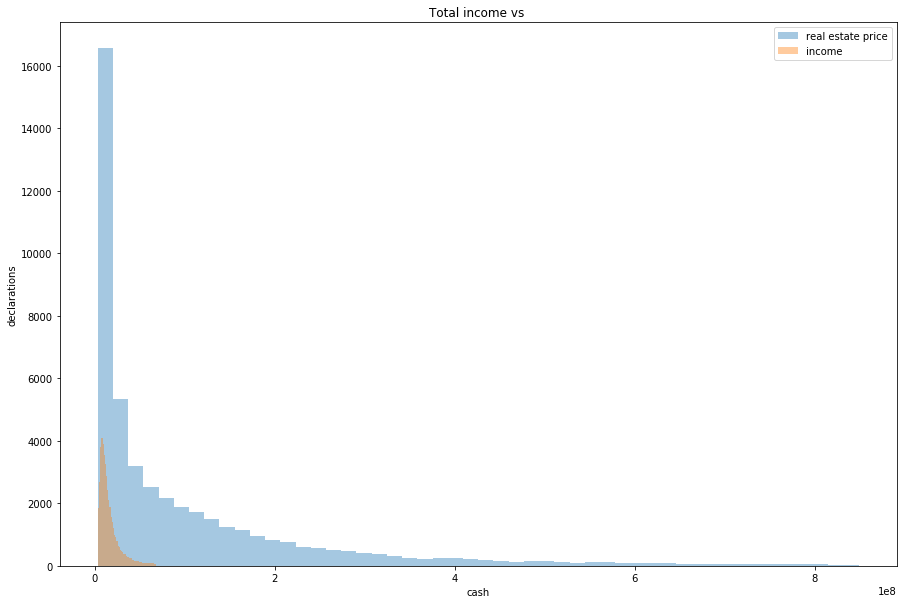

In [63]:
def no_o(arr, q=0.05):
    return arr[(arr < arr.quantile(1-q))&(arr > arr.quantile(q))]

plt.figure(figsize=(15, 10))
sns.distplot(no_o(grouped_df.real_estate_price), kde=False, label='real estate price')
sns.distplot(no_o(grouped_df.income*(2016-2009)), kde=False, label='income')
plt.legend()
plt.title('Total income vs ')
plt.xlabel('cash')
plt.ylabel('declarations')
plt.show()

In [64]:
grouped_df['yearly_incomes_in_real_estate'] = (grouped_df.real_estate_price+0.0001) / (grouped_df.income+0.0001)

In [65]:
grouped_df['yearly_incomes_in_real_estate'].describe()

count    5.167300e+04
mean     9.364650e+09
std      1.537060e+12
min      1.283363e-12
25%      6.824699e+00
50%      2.128016e+01
75%      7.214544e+01
max      3.328335e+14
Name: yearly_incomes_in_real_estate, dtype: float64

In [66]:
plt.figure(figsize=(15, 10))
sns.distplot(no_o(grouped_df['yearly_incomes_in_real_estate']), kde=False)
plt.show()

/home/boris/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [67]:
grouped_df.head()

income  real_estate_price  \
person_id person_name                                                    
8         Зюганов Геннадий Андреевич   3.736946e+06       2.390986e+07   
9         Алферов Жорес Иванович       1.680704e+07       9.951926e+08   
10        Андреев Андрей Анатольевич   4.176869e+06       4.880553e+07   
11        Апарина Алевтина Викторовна  2.302677e+06       6.026755e+06   
12        Афонин Юрий Вячеславович     6.160812e+06       1.223309e+08   

                                       yearly_incomes_in_real_estate  
person_id person_name                                                 
8         Зюганов Геннадий Андреевич                        6.398235  
9         Алферов Жорес Иванович                           59.212825  
10        Андреев Андрей Анатольевич                       11.684715  
11        Апарина Алевтина Викторовна                       2.617282  
12        Афонин Юрий Вячеславович                         19.856290

In [68]:
grouped_df.to_csv('yearly_incomes_in_real_estate.csv')

In [69]:
# d['main']['person']

In [70]:
for d in declarations:
    if d['main']['person']['id'] == 143:
        print(d)
        break

{'main': {'person': {'id': 143, 'name': 'Коган Александр Борисович', 'family_name': 'Коган', 'given_name': 'Александр', 'patronymic_name': 'Борисович'}, 'document_type': {'id': 2, 'name': 'Предвыборная декларация'}, 'year': 2010, 'office': {'id': 14, 'name': 'Государственная Дума', 'post': '', 'url': 'http://www.duma.gov.ru/', 'type': {'id': 7, 'name': 'Федеральный, без региональной структуры'}, 'region': None}, 'party': {'id': 1, 'name': 'Единая Россия'}}, 'incomes': [{'size': 2006909.96, 'relative': None, 'comment': 'ГОУ ВПО "Оренбурский Государственный Университет", Аппарат Государственной Думы Федерального Собрания Российской Федерации'}], 'real_estates': [{'name': '', 'square': 901.0, 'country': 'Россия', 'region': {'id': 105, 'name': 'Оренбургская область'}, 'comment': '', 'type': {'id': 1, 'name': 'Земельный участок'}, 'own_type': {'id': 1, 'name': 'В собственности'}, 'share_type': {'id': 2, 'name': 'Долевая собственность'}, 'share': 0.8, 'relative': None, 'estimated_price': 338

In [71]:
# d['real_estates']